In [38]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
df = pd.read_csv('rossmann_train.csv',low_memory=False)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df['Store'].value_counts()

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

<AxesSubplot:>

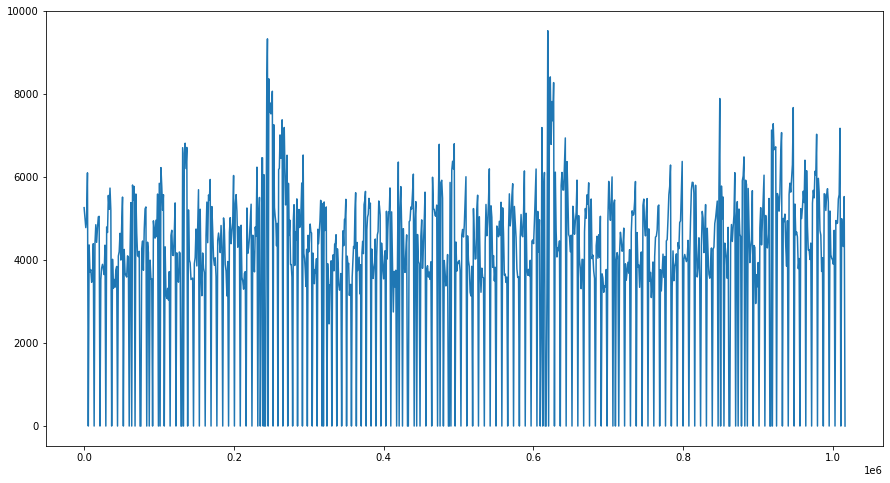

In [4]:
df[df.Store==1]['Sales'].plot()

In [5]:
(df[df['Store']==1]['Sales']==0).sum()

161

In [6]:
Store1 = df[df['Store']==1]

In [7]:
Store1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 1016095
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


<AxesSubplot:>

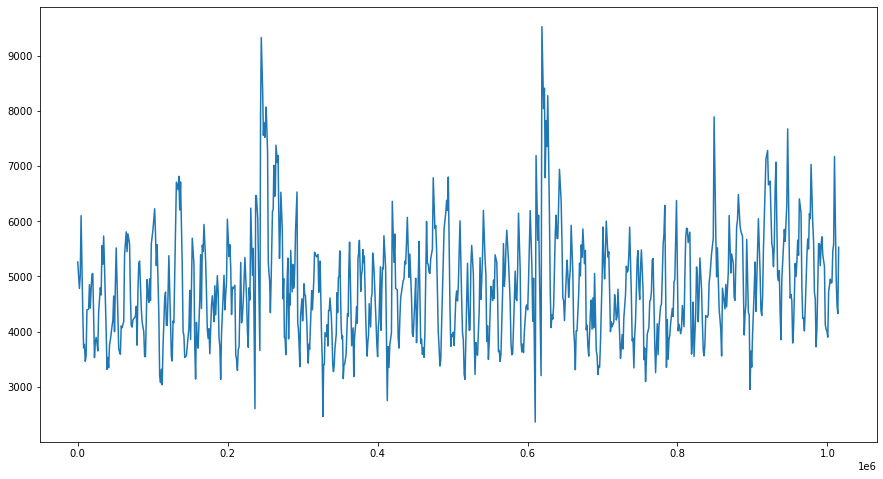

In [8]:
Store1[Store1['Open']>0]['Sales'].plot()

In [9]:
Store1['Date'] = pd.to_datetime(Store1['Date'])
Store1.set_index('Date',inplace=True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp/ipykernel_6968/4215607353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store1['Date'] = pd.to_datetime(Store1['Date'])


In [10]:
Store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


<AxesSubplot:xlabel='Date'>

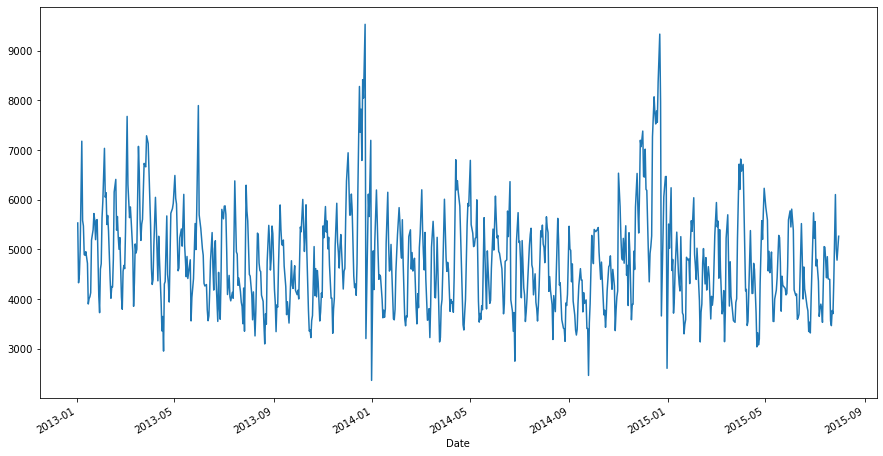

In [11]:
Store1[Store1.Customers >0]['Sales'].plot()

In [12]:
df_p = Store1[['Sales']].copy()

In [13]:
df_p['Date'] = df_p.index

In [14]:
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [15]:
df_p.sort_index(inplace=True)

In [16]:
df_p.head()

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05


In [17]:
# /This is the convetion of Prophet to model the Time Series
df_p.columns = ['y','ds']

In [18]:
df_p.tail()

,y,ds
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [19]:
m = Prophet()

In [20]:
m.fit(df_p)

10:04:50 - cmdstanpy - INFO - Chain [1] start processing
10:04:50 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future= m.make_future_dataframe(periods=365)

In [22]:
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29


In [23]:
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4231.642056,3460.501134,6307.355378,4231.642056,4231.642056,613.711779,613.711779,613.711779,706.314172,706.314172,706.314172,-92.602393,-92.602393,-92.602393,0.0,0.0,0.0,4845.353835
1,2013-01-02,4230.874212,3253.403697,5991.483119,4230.874212,4230.874212,355.963523,355.963523,355.963523,510.547977,510.547977,510.547977,-154.584454,-154.584454,-154.584454,0.0,0.0,0.0,4586.837735
2,2013-01-03,4230.106367,2787.799673,5596.021247,4230.106367,4230.106367,-56.051747,-56.051747,-56.051747,151.288442,151.288442,151.288442,-207.340189,-207.340189,-207.340189,0.0,0.0,0.0,4174.054621
3,2013-01-04,4229.338523,3044.524222,5939.060971,4229.338523,4229.338523,323.080833,323.080833,323.080833,573.626215,573.626215,573.626215,-250.545383,-250.545383,-250.545383,0.0,0.0,0.0,4552.419355
4,2013-01-05,4228.570678,3556.992203,6462.170160,4228.570678,4228.570678,714.996523,714.996523,714.996523,999.052085,999.052085,999.052085,-284.055562,-284.055562,-284.055562,0.0,0.0,0.0,4943.567201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,2016-07-26,3733.923652,2997.042723,5933.037524,3707.937461,3756.910937,713.230065,713.230065,713.230065,706.314172,706.314172,706.314172,6.915893,6.915893,6.915893,0.0,0.0,0.0,4447.153717
1303,2016-07-27,3733.699678,2813.094631,5675.652934,3707.639526,3756.801571,502.386554,502.386554,502.386554,510.547977,510.547977,510.547977,-8.161423,-8.161423,-8.161423,0.0,0.0,0.0,4236.086232
1304,2016-07-28,3733.475704,2446.842150,5269.480904,3707.337156,3756.640558,126.418902,126.418902,126.418902,151.288442,151.288442,151.288442,-24.869540,-24.869540,-24.869540,0.0,0.0,0.0,3859.894606
1305,2016-07-29,3733.251731,2800.417069,5758.032513,3706.995752,3756.462502,530.751516,530.751516,530.751516,573.626215,573.626215,573.626215,-42.874700,-42.874700,-42.874700,0.0,0.0,0.0,4264.003246


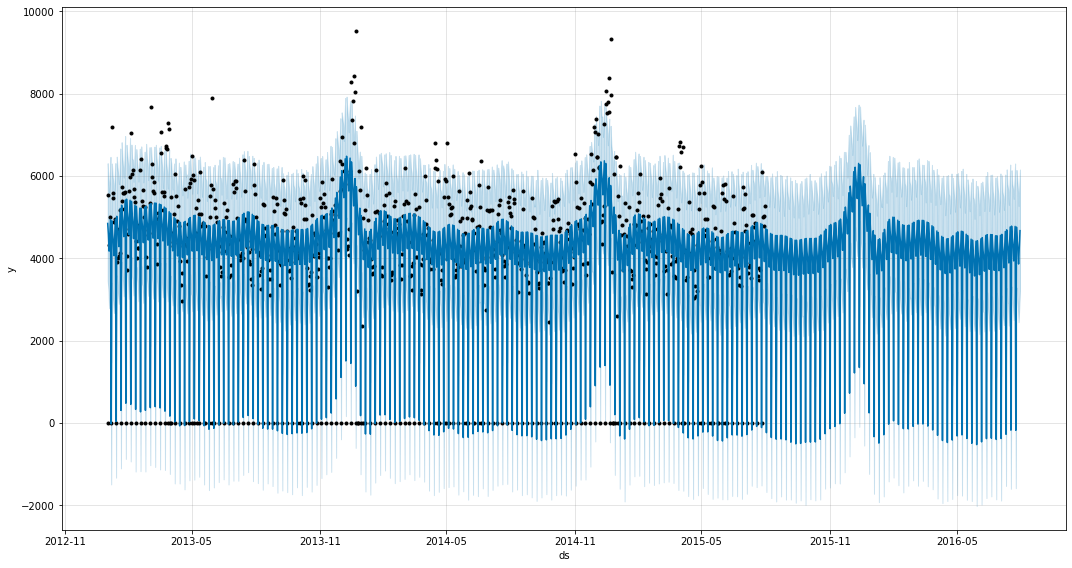

In [25]:
m.plot(forecast,figsize=(15,8));

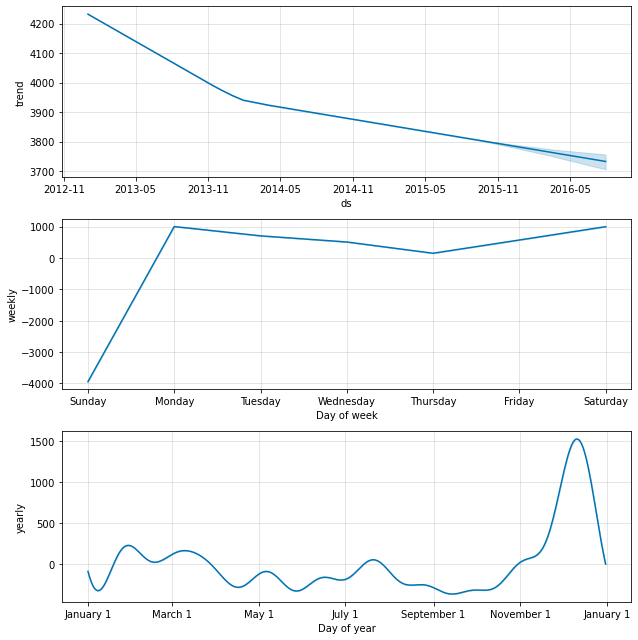

In [26]:
m.plot_components(forecast);

In [27]:
df_p2 = Store1[Store1['Open']>0][['Sales']].copy()

In [28]:
df_p2['Date'] = df_p2.index

In [29]:
df_p2.columns = ['y','ds']

In [30]:
df_p2

,y,ds
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27
...,...,...
2013-01-07,7176,2013-01-07
2013-01-05,4997,2013-01-05
2013-01-04,4486,2013-01-04


In [31]:
m2 = Prophet()
m2.fit(df_p2)

10:04:55 - cmdstanpy - INFO - Chain [1] start processing
10:04:56 - cmdstanpy - INFO - Chain [1] done processing


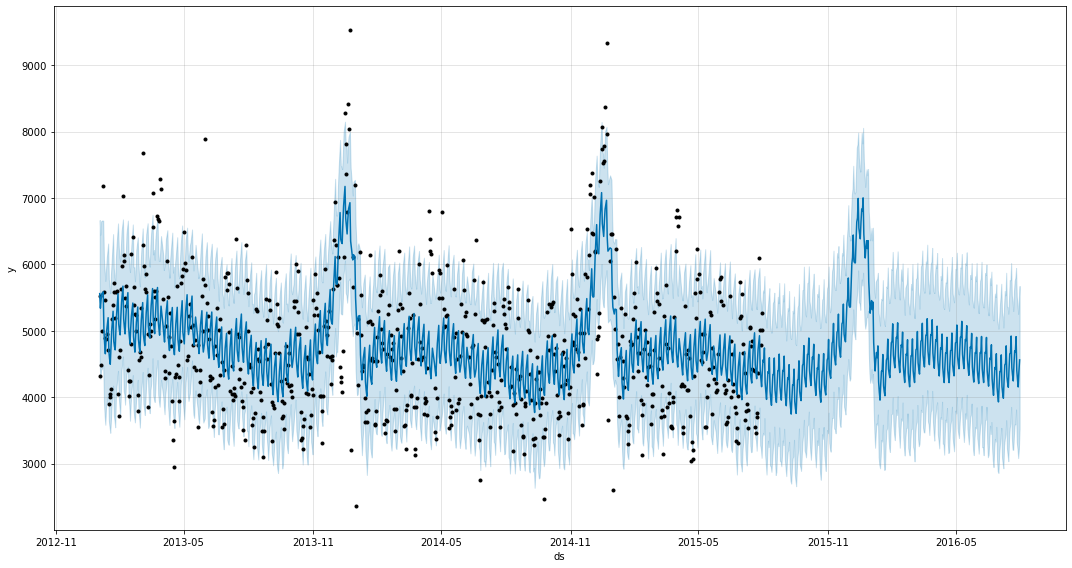

In [32]:
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2,figsize=(15,8));

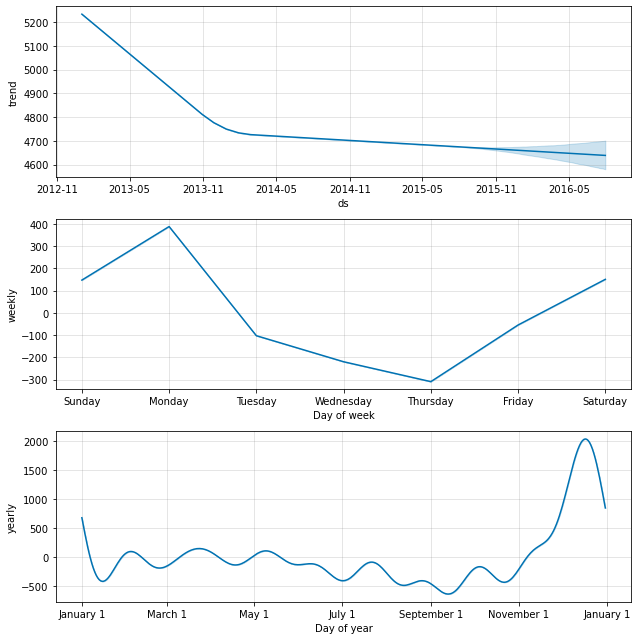

In [33]:
m2.plot_components(forecast2);

In [34]:
#add holidays
m3 = Prophet()

In [35]:
m3.add_country_holidays(country_name= 'US')
m3.fit(df_p2)

10:05:00 - cmdstanpy - INFO - Chain [1] start processing
10:05:00 - cmdstanpy - INFO - Chain [1] done processing


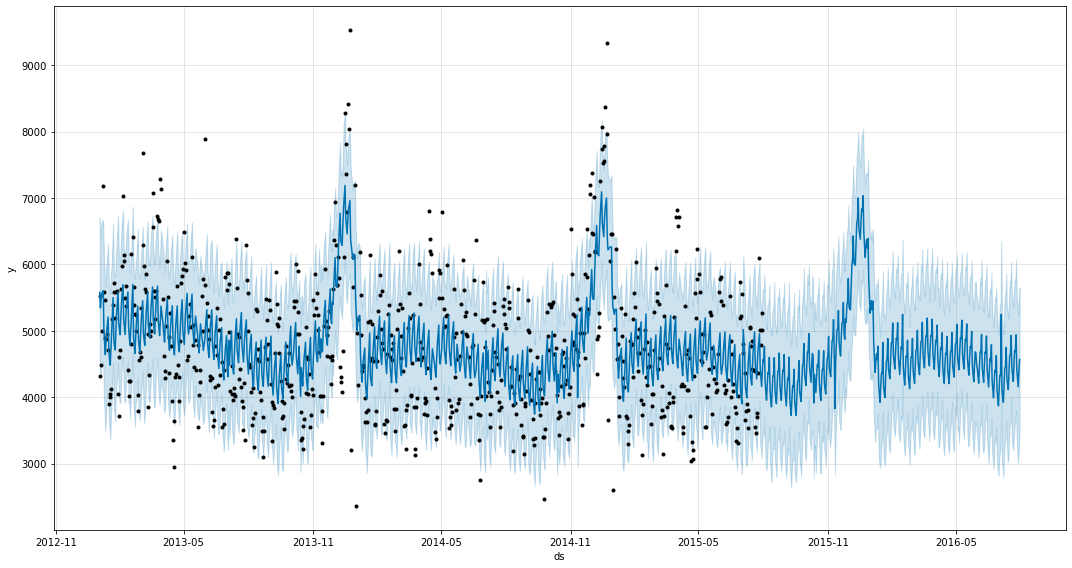

In [39]:
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)
m3.plot(forecast3,figsize=(15,8));

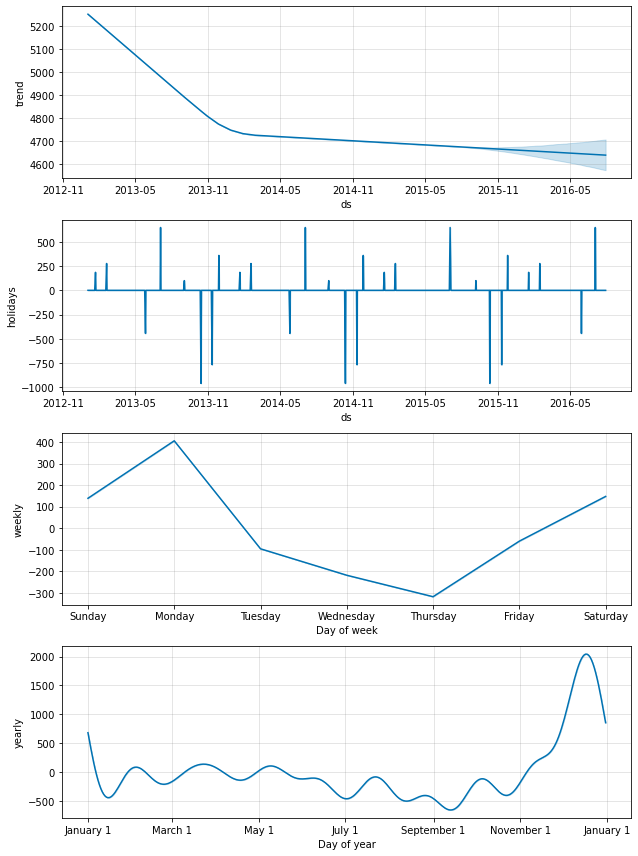

In [41]:
m3.plot_components(forecast3);

In [42]:
# Add Regressors
set(Store1.StateHoliday)

{'0', 'a', 'b', 'c'}

In [43]:
set(Store1.SchoolHoliday)

{0, 1}

In [45]:
df_p2['Open'] = Store1['Open']
df_p2['Promo'] = Store1['Promo']
df_p2[['SH1','SH2','SH3']] = pd.get_dummies(Store1['StateHoliday'],drop_first=True)
df_p2['SchoolHoliday'] = Store1['SchoolHoliday']

In [47]:
df_p2.head(10)

,y,ds,Open,Promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2015-07-31,5263,2015-07-31,1,1,0,0,0,1
2015-07-30,5020,2015-07-30,1,1,0,0,0,1
2015-07-29,4782,2015-07-29,1,1,0,0,0,1
2015-07-28,5011,2015-07-28,1,1,0,0,0,1
2015-07-27,6102,2015-07-27,1,1,0,0,0,1
2015-07-25,4364,2015-07-25,1,0,0,0,0,0
2015-07-24,3706,2015-07-24,1,0,0,0,0,0
2015-07-23,3769,2015-07-23,1,0,0,0,0,0
2015-07-22,3464,2015-07-22,1,0,0,0,0,0


In [53]:
df_p['Open'] = Store1['Open']
df_p['Promo'] = Store1['Promo']
df_p[['SH1','SH2','SH3']] = pd.get_dummies(Store1['StateHoliday'],drop_first=True)
df_p['SchoolHoliday'] = Store1['SchoolHoliday']

In [54]:
df_p.head()

,y,ds,Open,Promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,1,0,0,1
2013-01-02,5530,2013-01-02,1,0,0,0,0,1
2013-01-03,4327,2013-01-03,1,0,0,0,0,1
2013-01-04,4486,2013-01-04,1,0,0,0,0,1
2013-01-05,4997,2013-01-05,1,0,0,0,0,1


In [55]:
m4 = Prophet()

In [57]:
m4.add_regressor('Open')
m4.add_regressor('Promo')
m4.add_regressor('SH1')
m4.add_regressor('SH2')
m4.add_regressor('SH3')
m4.add_regressor('SchoolHoliday')
m4.fit(df_p)

10:27:45 - cmdstanpy - INFO - Chain [1] start processing
10:27:46 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future4 = m4.make_future_dataframe(periods=365)

In [59]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [63]:
regressors =["Open","Promo","SH1","SH2","SH3","SchoolHoliday"]
for r in regressors:
    future4.loc[train_idx,r] = df_p[r].to_list()

In [66]:
future4.loc[test_idx,'Open'] = future4.loc[test_idx,'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

In [72]:
for r in regressors[1:]:
    future4.loc[test_idx,r] = df_p.iloc[-365:][r].to_list()

In [75]:
future4.tail(12)

,ds,Open,Promo,SH1,SH2,SH3,SchoolHoliday
1295,2016-07-19,1.0,0.0,0.0,0.0,0.0,0.0
1296,2016-07-20,1.0,0.0,0.0,0.0,0.0,0.0
1297,2016-07-21,1.0,0.0,0.0,0.0,0.0,0.0
1298,2016-07-22,1.0,0.0,0.0,0.0,0.0,0.0
1299,2016-07-23,1.0,0.0,0.0,0.0,0.0,0.0
1300,2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0
1301,2016-07-25,1.0,0.0,0.0,0.0,0.0,0.0
1302,2016-07-26,1.0,1.0,0.0,0.0,0.0,1.0
1303,2016-07-27,1.0,1.0,0.0,0.0,0.0,1.0
1304,2016-07-28,1.0,1.0,0.0,0.0,0.0,1.0


In [77]:
forecast4 = m4.predict(future4)

In [78]:
forecast4.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Open,Open_lower,Open_upper,Promo,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,655.056670,-199.295862,1306.968937,655.056670,655.056670,0.000000,0.000000,0.000000,0.0,...,-151.431967,-151.431967,-151.431967,507.143883,507.143883,507.143883,0.0,0.0,0.0,531.856051
1,2013-01-02,653.555498,4071.257581,5627.983685,653.555498,653.555498,3902.201928,3902.201928,3902.201928,0.0,...,-272.681554,-272.681554,-272.681554,382.363080,382.363080,382.363080,0.0,0.0,0.0,4851.334043
2,2013-01-03,652.054327,3915.707881,5381.619986,652.054327,652.054327,3902.201928,3902.201928,3902.201928,0.0,...,-353.103869,-353.103869,-353.103869,262.517560,262.517560,262.517560,0.0,0.0,0.0,4649.565037
3,2013-01-04,650.553156,4041.110052,5589.217319,650.553156,650.553156,3902.201928,3902.201928,3902.201928,0.0,...,-94.143105,-94.143105,-94.143105,149.136813,149.136813,149.136813,0.0,0.0,0.0,4793.643884
4,2013-01-05,649.051984,4845.678331,6328.852029,649.051984,649.051984,3902.201928,3902.201928,3902.201928,0.0,...,791.380292,791.380292,791.380292,43.595377,43.595377,43.595377,0.0,0.0,0.0,5572.124673


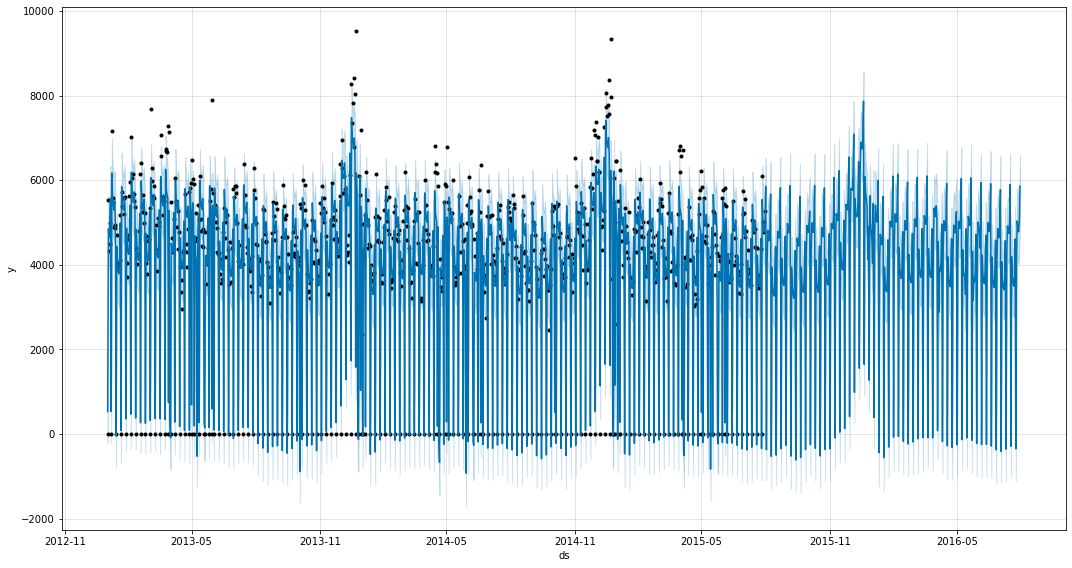

In [80]:
m4.plot(forecast4,figsize=(15,8));

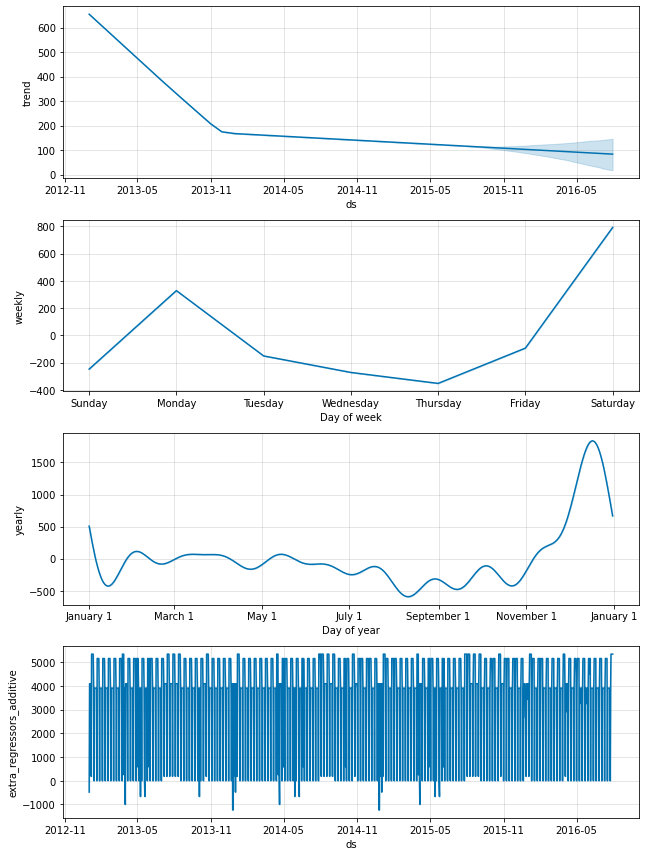

In [81]:
m4.plot_components(forecast4);

In [82]:
from prophet.diagnostics import cross_validation

In [84]:
df_cv = cross_validation(m,initial='730 days', period='30 days', horizon='60 days')
df_cv.head(20)

  0%|          | 0/6 [00:00<?, ?it/s]

11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:25 - cmdstanpy - INFO - Chain [1] done processing
11:13:27 - cmdstanpy - INFO - Chain [1] start processing
11:13:27 - cmdstanpy - INFO - Chain [1] done processing
11:13:29 - cmdstanpy - INFO - Chain [1] start processing
11:13:29 - cmdstanpy - INFO - Chain [1] done processing
11:13:31 - cmdstanpy - INFO - Chain [1] start processing
11:13:31 - cmdstanpy - INFO - Chain [1] done processing
11:13:33 - cmdstanpy - INFO - Chain [1] start processing
11:13:33 - cmdstanpy - INFO - Chain [1] done processing
11:13:35 - cmdstanpy - INFO - Chain [1] start processing
11:13:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4610.222383,3151.149469,6087.579019,5023,2015-01-02
1,2015-01-04,-444.404895,-1806.596750,1044.785622,0,2015-01-02
2,2015-01-05,4572.787881,3142.464451,6119.352437,6239,2015-01-02
3,2015-01-06,4188.120621,2722.746248,5628.715804,4574,2015-01-02
4,2015-01-07,3950.166158,2475.371670,5292.137376,4796,2015-01-02
5,2015-01-08,3589.869985,2199.541486,5138.107631,3716,2015-01-02
6,2015-01-09,4119.793433,2697.556012,5590.333134,3998,2015-01-02
7,2015-01-10,4489.396062,3065.105114,6033.643126,4599,2015-01-02
8,2015-01-11,-491.231462,-1900.907302,932.831105,0,2015-01-02
9,2015-01-12,4596.622172,3159.820266,6155.808867,5346,2015-01-02


In [87]:
from prophet.diagnostics import performance_metrics

In [88]:
pm = performance_metrics(df_cv)
pm
# by defult it is calculating by moving average, window size of 10% by default of horizon

,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.224656e+06,1491.528071,920.510113,0.137941,0.550565,0.805556
1,7 days,1.586613e+06,1259.608206,758.243469,0.131331,0.491704,0.833333
2,8 days,1.459956e+06,1208.286234,704.083904,0.123455,0.486003,0.888889
3,9 days,1.166266e+06,1079.937912,688.603436,0.145110,0.453495,0.916667
4,10 days,5.031827e+05,709.353734,576.770545,0.154510,0.459905,0.944444
5,11 days,4.942255e+05,703.011705,567.727816,0.146653,0.403036,0.944444
6,12 days,8.554970e+05,924.930818,631.333713,0.146653,0.449852,0.944444
7,13 days,8.256523e+05,908.654106,603.918649,0.135675,0.441364,0.944444
8,14 days,7.820015e+05,884.308459,565.652624,0.123856,0.432790,0.944444
9,15 days,6.553336e+05,809.526773,496.925593,0.102842,0.414352,0.972222


In [89]:
from prophet.plot import plot_cross_validation_metric

C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


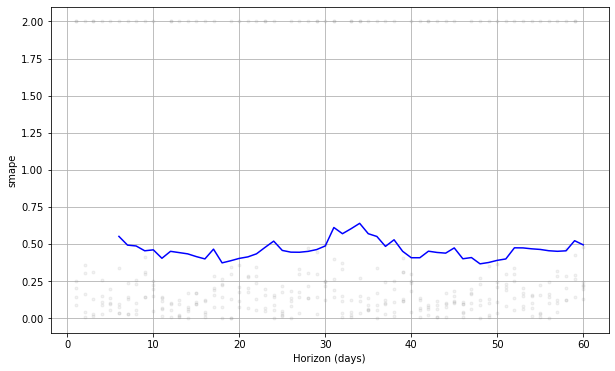

In [91]:
plot_cross_validation_metric(df_cv,metric='smape');

0.4348974862846194


C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


0.15381809346394223


C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


0.15399995159455135


C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


0.4348974862846194


C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Mirz\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


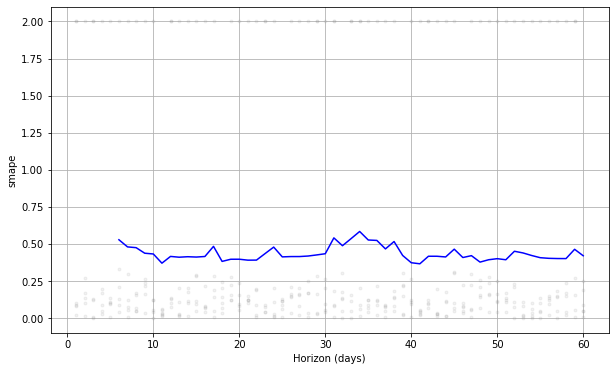

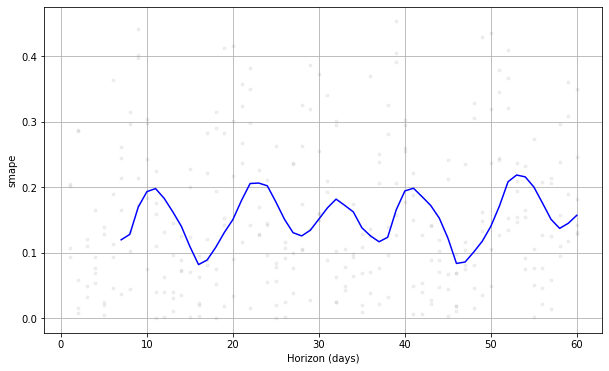

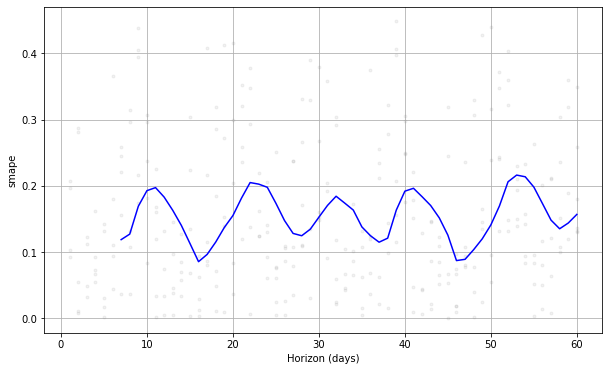

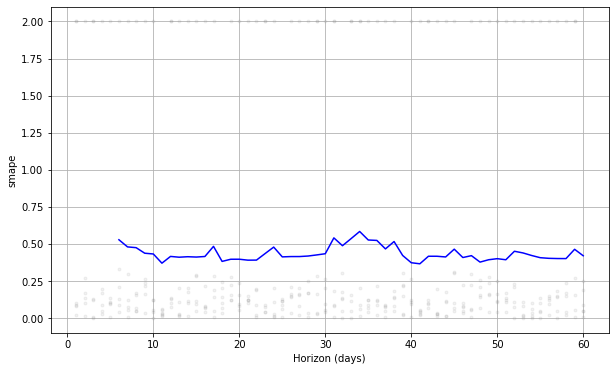

In [98]:
df_cv_n = []
m = [m,m2,m3,m4]
for m in m:
    cv = cross_validation(m, initial= '730 days', period='30 days',horizon= '60 days',parallel='processes',disable_tqdm=True)
    df_cv_n.append(cv)
    pm = performance_metrics(cv)
    print(pm['smape'].mean())
    plot_cross_validation_metric(cv,metric='smape')
    

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4610.222383,3182.740550,6105.224414,5023,2015-01-02
1,2015-01-04,-444.404895,-1767.126917,1194.381299,0,2015-01-02
2,2015-01-05,4572.787881,3020.959382,5987.254370,6239,2015-01-02
3,2015-01-06,4188.120621,2703.466983,5625.608130,4574,2015-01-02
4,2015-01-07,3950.166158,2616.892689,5468.741929,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4767.262334,3356.122500,6184.306053,6102,2015-06-01
356,2015-07-28,4442.712196,3063.352708,5836.785264,5011,2015-06-01
357,2015-07-29,4228.024571,2801.598463,5621.641245,4782,2015-06-01
358,2015-07-30,3852.353607,2373.416815,5250.601804,5020,2015-06-01


In [99]:
from prophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x1da576c3100>],

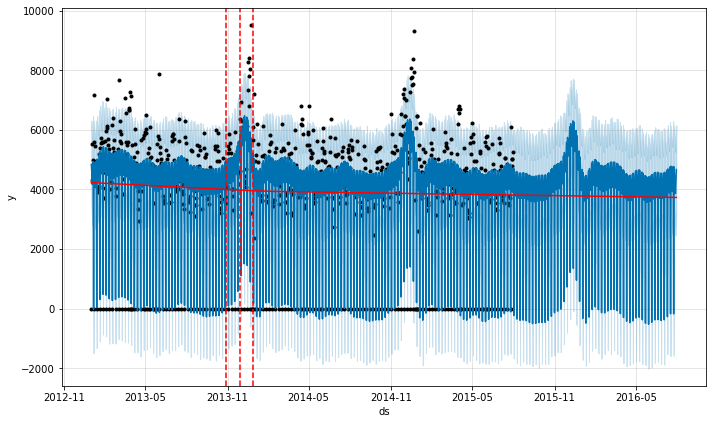

In [100]:
fig = m.plot(forecast)
add_changepoints_to_plot(fig.gca(),m,forecast)

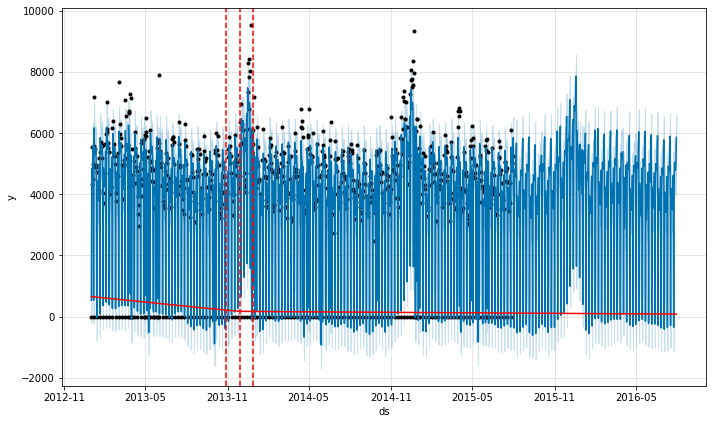

In [102]:
fig = m4.plot(forecast4)
add_changepoints_to_plot(fig.gca(),m4,forecast4);

In [115]:
m_new = Prophet(changepoint_prior_scale=0.8)

In [116]:
forec = m_new.fit(df_p2).predict()

12:03:16 - cmdstanpy - INFO - Chain [1] start processing
12:03:16 - cmdstanpy - INFO - Chain [1] done processing


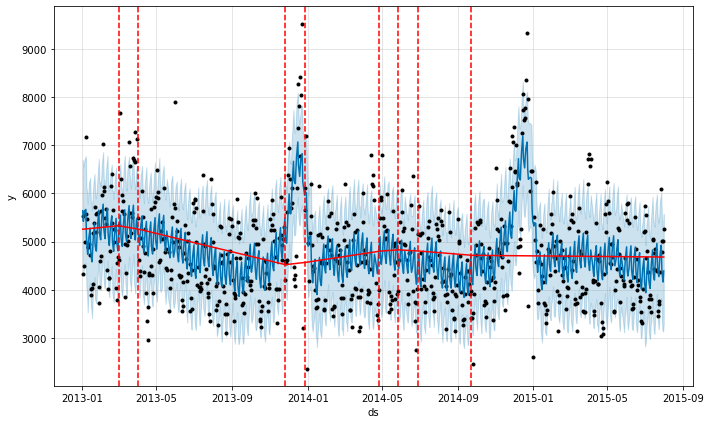

In [117]:
fig = m_new.plot(forec);
add_changepoints_to_plot(fig.gca(),m_new,forec);